Adınız: Hilal Sevda Soyadınız: Akatekin Okul Numaranız: 2212721042 GitHub Repo Bağlantısı: https://github.com/hillsvda/CNN_siniflandirma-

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16 # State-of-the-art mimari (örneğimiz VGG16)
import matplotlib.pyplot as plt
import numpy as np

# TensorFlow/Keras'ın doğru yüklendiğini kontrol edebi
liriz
print("TensorFlow Versiyonu:", tf.__version__)

In [2]:
# Veri Seti Parametreleri
DATASET_DIR = 'dataset' 
IMAGE_SIZE = (64, 64)   # YENİ BOYUT: 64x64 piksel
BATCH_SIZE = 32         

# ImageDataGenerator Tanımlama
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2) 

# Eğitim Seti (Training Set)
# Görüntüleri 64x64 boyutuna getirir ve eğitim için %80'ini alır.
train_generator = datagen.flow_from_directory(
    DATASET_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical', 
    subset='training' 
)

# Doğrulama Seti (Validation Set)
# Görüntüleri 64x64 boyutuna getirir ve %20'sini alır.
validation_generator = datagen.flow_from_directory(
    DATASET_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation' 
)

print(f"Toplam Sınıf Sayısı: {train_generator.num_classes}")
print(f"Sınıf İsimleri: {train_generator.class_indices}")

Found 84 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Toplam Sınıf Sayısı: 2
Sınıf İsimleri: {'sınıf1_cüzdan': 0, 'sınıf2_mouse': 1}


In [3]:
# ImageNet ağırlıklarıyla VGG16 Temel Modelini Yükleme
# input_shape: Giriş boyutunu 64x64x3 olarak güncelliyoruz.
base_model = VGG16(weights='imagenet', 
                   include_top=False,  
                   input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)) # Giriş Boyutu Güncellendi

# 1. Temel Modeli Dondurma
for layer in base_model.layers:
    layer.trainable = False

# 2. Kendi Sınıflandırma Katmanlarımızı Ekleme
x = base_model.output
x = GlobalAveragePooling2D()(x) 
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x) 

# 3. Son Modeli Oluşturma ve Derleme
model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Modelin Özetini Görme
model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 49s 1us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │         525,3

 Total params: 15,242,050 (58.14 MB)

 Trainable params: 527,362 (2.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [4]:
# Modeli Eğitme
EPOCHS = 10

print("Model Eğitimi Başlatılıyor...")

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE, # Her epokta çalışacak adım sayısı
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

print("Model Eğitimi Tamamlandı.")

Model Eğitimi Başlatılıyor...
Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 26s 14s/step - accuracy: 0.5192 - loss: 0.6329 - val_accuracy: 0.8500 - val_loss: 0.4858
Epoch 2/10
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 685ms/step - accuracy: 0.7812 - loss: 0.5117

C:\Users\huaweı\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 4s/step - accuracy: 0.7812 - loss: 0.5117 - val_accuracy: 0.6000 - val_loss: 0.6923
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 14s 11s/step - accuracy: 0.8077 - loss: 0.3796 - val_accuracy: 0.5500 - val_loss: 0.6241
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 4s/step - accuracy: 0.9375 - loss: 0.1774 - val_accuracy: 0.7000 - val_loss: 0.5226
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 14s 8s/step - accuracy: 0.9615 - loss: 0.1863 - val_accuracy: 0.8000 - val_loss: 0.4432
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 4s/step - accuracy: 0.9375 - loss: 0.2664 - val_accuracy: 0.8000 - val_loss: 0.4566
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 14s 8s/step - accuracy: 0.9615 - loss: 0.1570 - val_accuracy: 0.7000 - val_loss: 0.6325
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 4s/step - accuracy: 0.9375 - loss: 0.1153 - val_accuracy: 0.6000 - val_loss: 0.7276
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 14s 8s/step - accuracy: 0.9615 - loss: 0.1237 - val_accuracy: 0.6500 - val_loss: 0.7607
Epoch 10/10
2/2 ━━━━━━

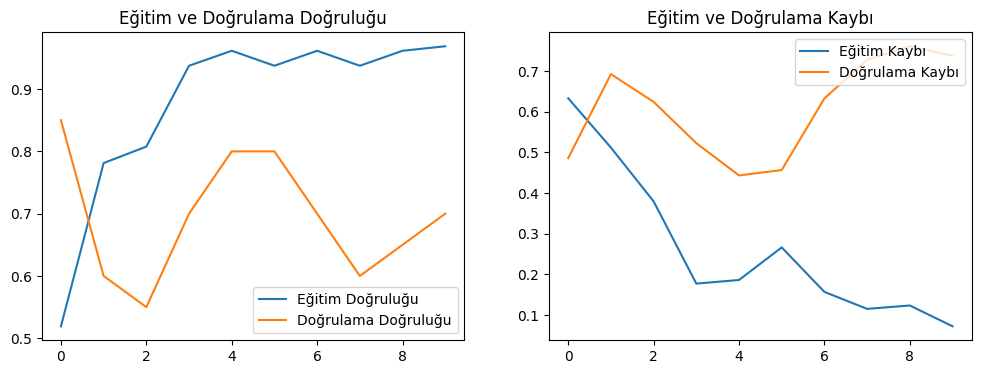

In [5]:
# Grafikleri çizdirmek için matplotlib kullanılır
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))

# Doğruluk Grafiği
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Eğitim Doğruluğu')
plt.plot(epochs_range, val_acc, label='Doğrulama Doğruluğu')
plt.legend(loc='lower right')
plt.title('Eğitim ve Doğrulama Doğruluğu')

# Kayıp Grafiği
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Eğitim Kaybı')
plt.plot(epochs_range, val_loss, label='Doğrulama Kaybı')
plt.legend(loc='upper right')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.show()

In [6]:
# Doğrulama seti üzerinde değerlendirme yapma (Test seti yerine kullanılır)
# Bu skor, Model 1'in performansını temsil edecektir.
print("Model 1 Doğrulama Seti Üzerinde Değerlendiriliyor...")
loss, accuracy = model.evaluate(validation_generator)

print(f"\nModel 1 (Transfer Öğrenme) Doğrulama Kaybı: {loss:.4f}")
print(f"Model 1 (Transfer Öğrenme) Doğrulama Doğruluğu: {accuracy:.4f}")

Model 1 Doğrulama Seti Üzerinde Değerlendiriliyor...
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.7000 - loss: 0.7373

Model 1 (Transfer Öğrenme) Doğrulama Kaybı: 0.7373
Model 1 (Transfer Öğrenme) Doğrulama Doğruluğu: 0.7000
